In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

In [ ]:
iris = load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

# KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(df)

KMeans(n_clusters=3, n_init='auto')

In [ ]:
labels = kmeans.labels_
df['clusters_kmeans']=labels
silhouette = silhouette_score(df, labels)

print("IRIS Dataset - KMeans")
print("Clusters:", kmeans.cluster_centers_)
print("Silhouette Score:", silhouette)


IRIS Dataset - KMeans
Clusters: [[5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Silhouette Score: 0.6231049666420607


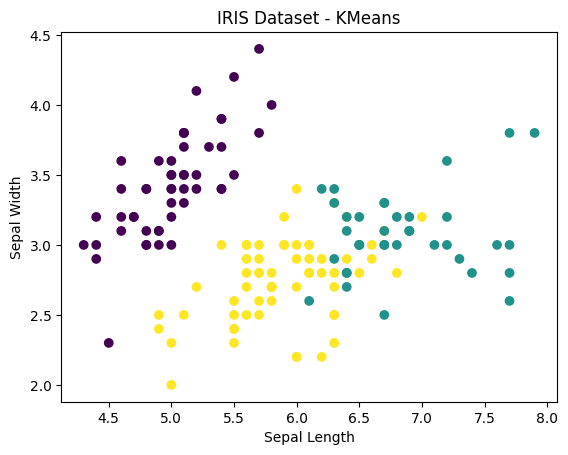

In [ ]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['clusters_kmeans'], cmap='viridis')
plt.title("IRIS Dataset - KMeans")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

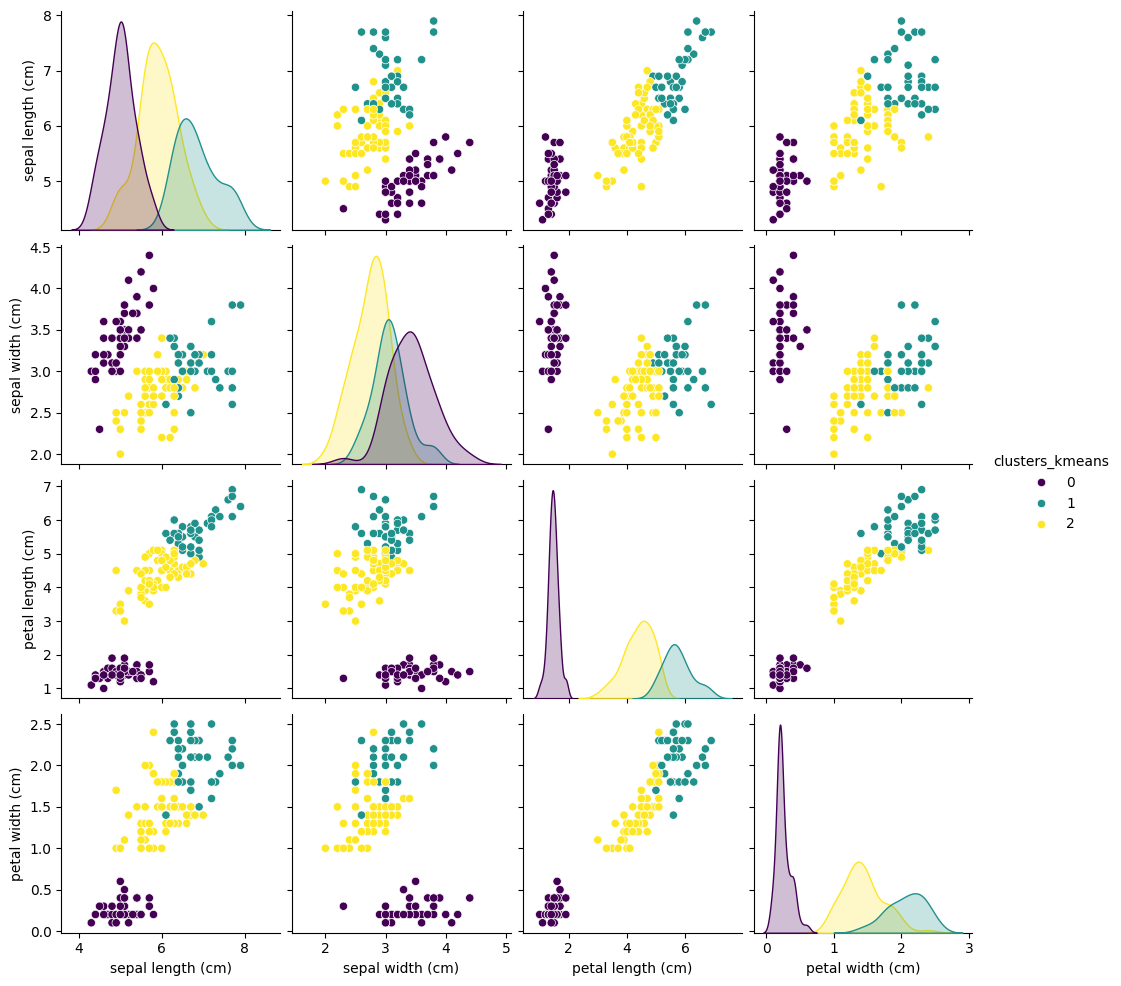

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,hue='clusters_kmeans',palette='viridis')
plt.show()

# DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters_kmeans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
dbscan=DBSCAN(eps=0.5,min_samples=5)
labels=dbscan.fit_predict(df)
df['clusters_dbscan']=labels
silhouette = silhouette_score(df, df['clusters_dbscan'])
print("Silhouette Score:", silhouette)

Silhouette Score: 0.4894152356694643


In [ ]:
labels

array([ 0,  1,  1,  1,  0,  2, -1,  0, -1,  1,  2,  0,  1, -1, -1, -1,  2,
        0,  2,  2,  2,  2, -1,  2, -1,  1,  0,  0,  0,  1,  1,  2,  2,  2,
        1,  0,  2,  0, -1,  0,  0, -1, -1,  2,  2,  1,  2, -1,  0,  0,  5,
        3, -1,  4,  5,  4, -1, -1,  5, -1, -1,  3, -1,  3, -1,  5,  4,  4,
       -1,  4,  6,  3,  6,  3,  3,  5,  5, -1,  3, -1,  4,  4,  4,  6, -1,
       -1,  5, -1,  4,  4,  4,  3,  4, -1,  4,  4,  4,  3, -1,  4, -1,  6,
        9,  7,  7, -1, -1,  9, -1, -1,  7,  7,  7,  6, -1,  7,  7, -1, -1,
       -1,  8,  6, -1,  6,  8,  9,  6,  6,  7,  9,  9, -1,  7,  6, -1, -1,
       -1,  7,  6,  7,  8,  7,  6,  8,  8,  7,  6,  7, -1,  6])

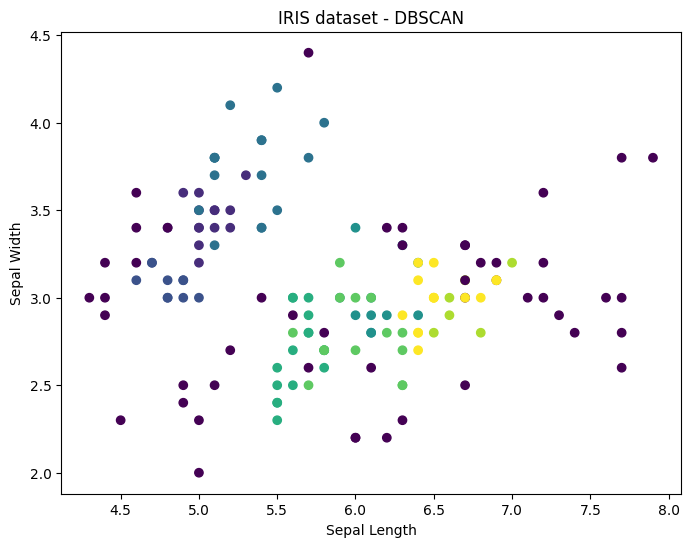

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['clusters_dbscan'],cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('IRIS dataset - DBSCAN')
plt.show()

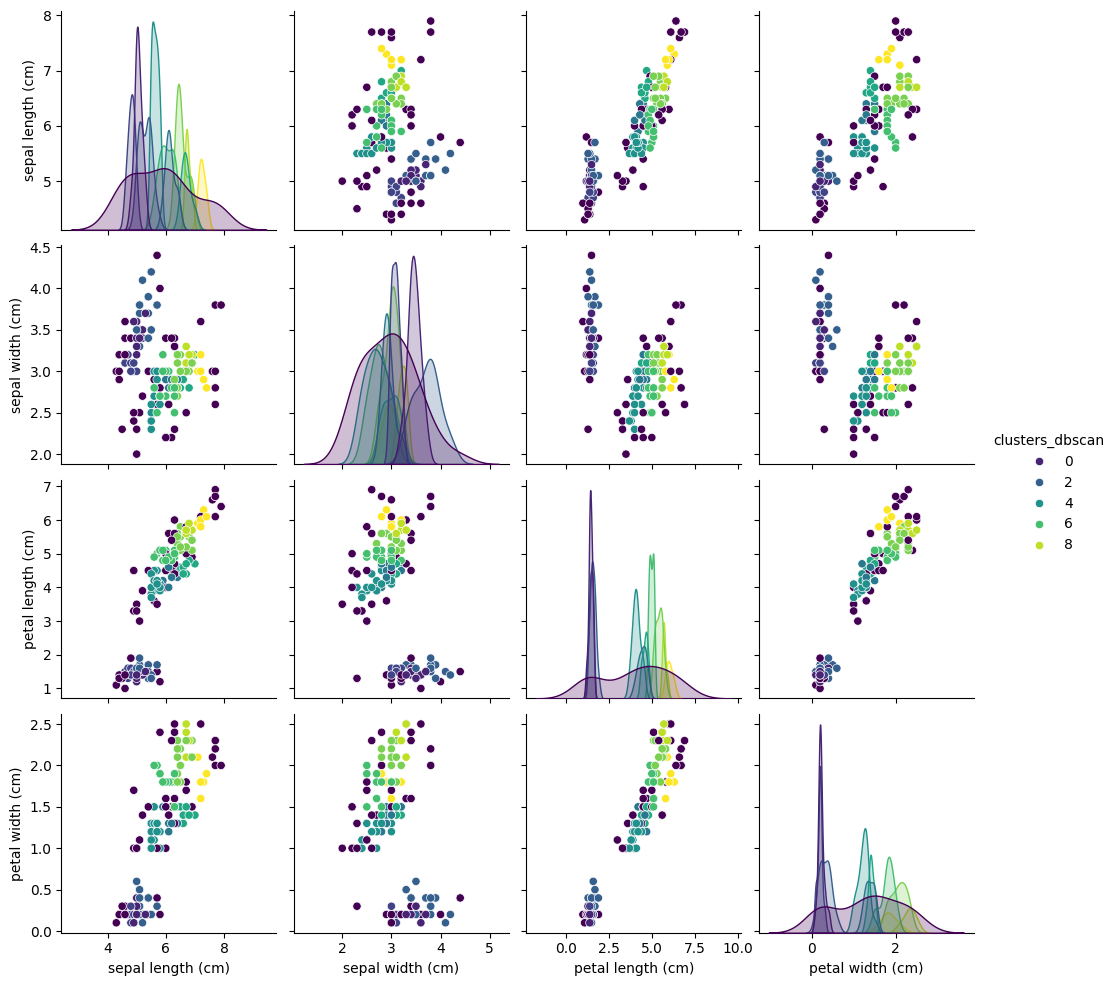

In [ ]:
sns.pairplot(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','clusters_dbscan']],hue='clusters_dbscan',palette='viridis')
plt.show()

In [ ]:
silhouette = silhouette_score(df, df['clusters_dbscan'])

In [ ]:
print("Silhouette Score:", silhouette)

Silhouette Score: 0.6128040101408866


# OPTICS CLustering

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
optics=OPTICS(min_samples=5,xi=0.05,min_cluster_size=7)
labels=optics.fit_predict(df)
silhouette=silhouette_score(df,labels)
df['clusters_optics']=labels
print(f'silhoutte score= {silhouette}')
print(np.unique(labels))
print(f"No. of clusters= {len(np.unique(labels))}")

silhoutte score= 0.6902819093380882
[-1  0  1  2  3  4  5  6  7  8  9 10 11]
No. of clusters= 13


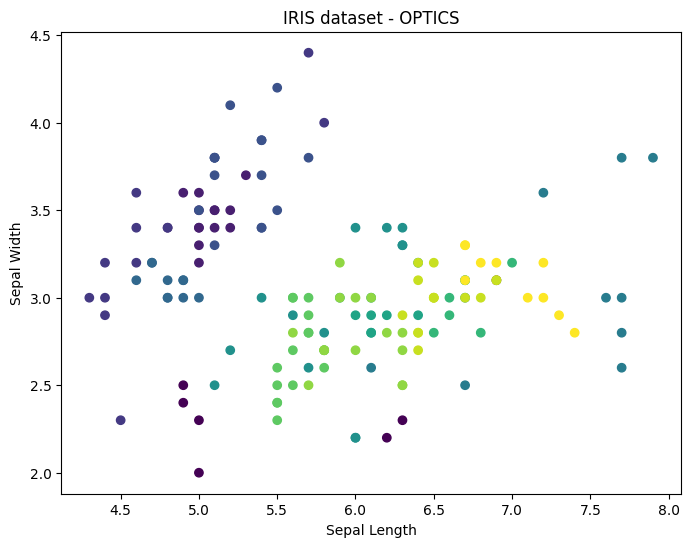

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['clusters_optics'],cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('IRIS dataset - OPTICS')
plt.show()

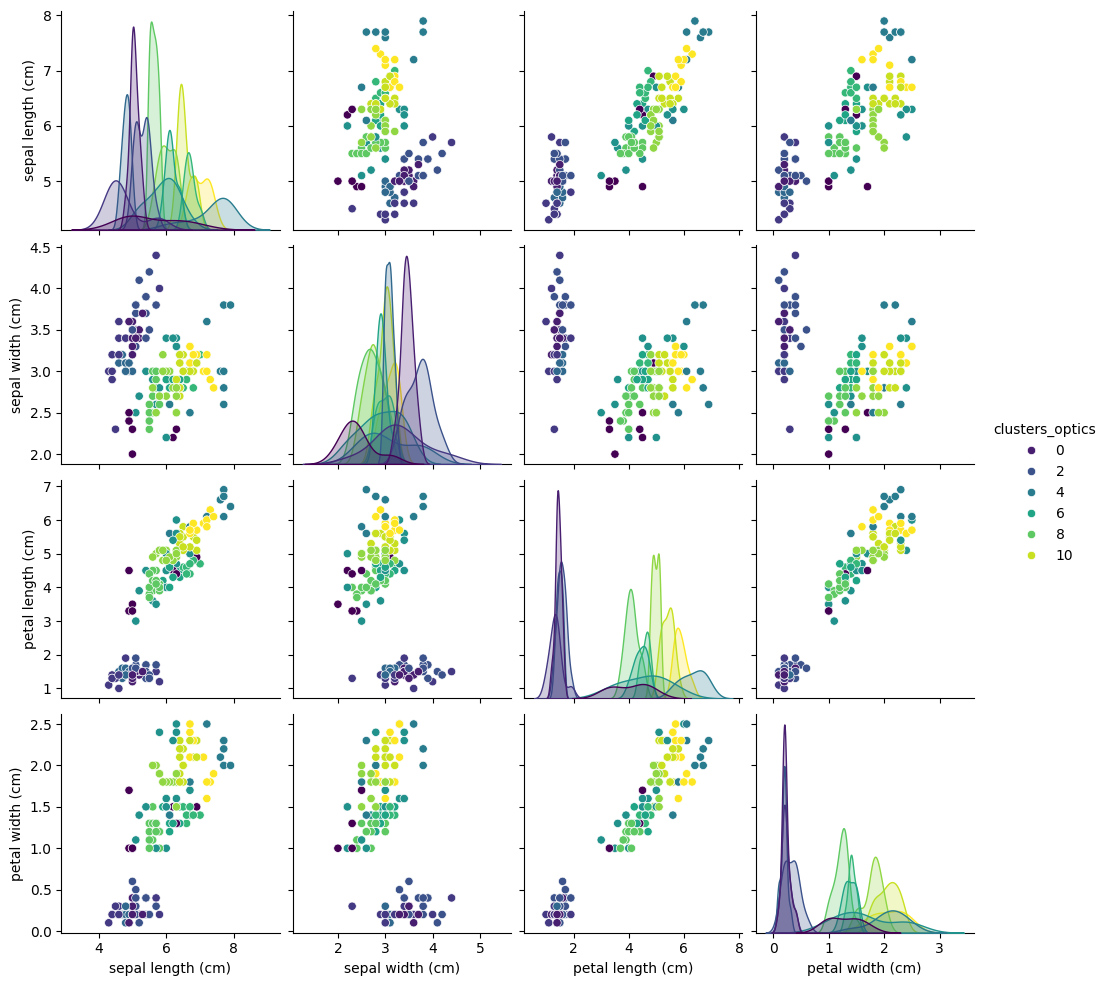

In [ ]:
sns.pairplot(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','clusters_optics']], hue='clusters_optics', palette='viridis')
plt.show()

# CLARA Clustering